In [2]:
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

In [28]:
path = os.getcwd()+"\\object_detection\\frames\\"
col_frames = os.listdir(path)
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))
col_images=[]
for i in col_frames:
    img = cv2.imread(path+i)
    col_images.append(img)

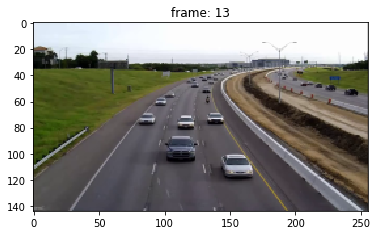

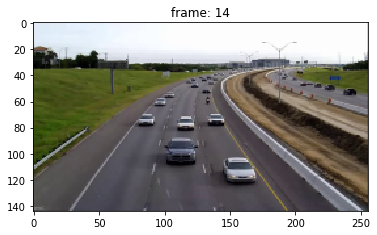

In [29]:
i = 13
for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

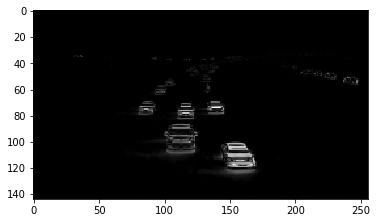

In [31]:
grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

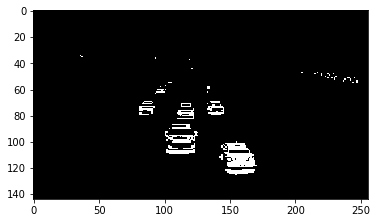

In [32]:
diff_image = cv2.absdiff(grayB, grayA)
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap = 'gray')
plt.show()

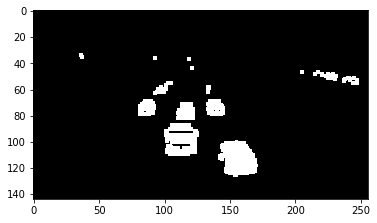

In [33]:
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

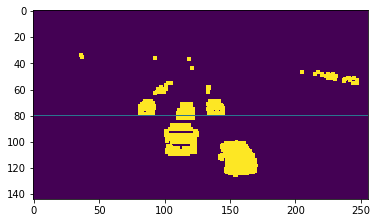

In [35]:
plt.imshow(dilated)
cv2.line(dilated, (0, 80),(256,80),(100, 0, 0),9)
plt.show()

In [36]:
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [37]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

6

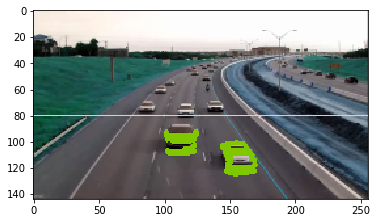

In [38]:
dmy = col_images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
plt.imshow(dmy)
plt.show()

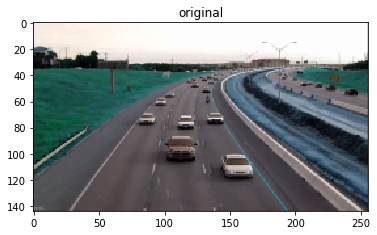

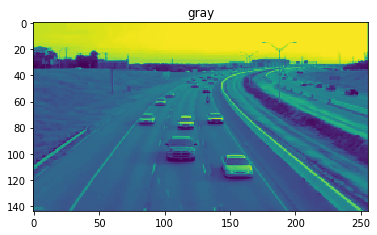

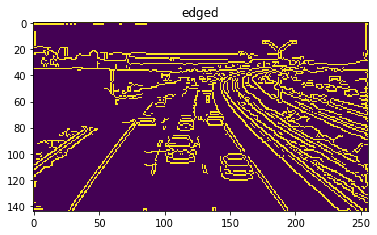

In [47]:
canny = col_images[13].copy()
gray = cv2.cvtColor(canny, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 150) 
plt.imshow(canny)
plt.title('original')
plt.show()
plt.imshow(gray)
plt.title('gray')
plt.show()
plt.imshow(edged)
plt.title('edged')
plt.show()
cv2.destroyAllWindows() 

In [89]:
kernel = np.ones((4,4),np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
pathIn = os.getcwd()+"\\object_detection\\"+"contour_frames\\"

for i in range(len(col_images)-1):
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    height, width = diff_image.shape
    min_x, min_y = width, height
    max_x = max_y = 0
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)  
    dilated = cv2.dilate(thresh,kernel,iterations = 1)  
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
    for cntr in valid_cntrs:
        x,y,w,h = cv2.boundingRect(cntr)
        min_x, max_x = min(x, min_x), max(x+w, max_x)
        min_y, max_y = min(y, min_y), max(y+h, max_y)
        cv2.rectangle(dmy, (x,y), (x+w,y+h), (255, 0, 0), 2)
    cv2.imwrite(pathIn+str(i)+'.png',dmy)

In [90]:
pathOut = os.getcwd()+"\\object_detection\\vehicle_detection\\"+'vehicle_detection.mp4'
fps = 14.0
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))
for i in range(len(files)):
    filename=pathIn + files[i]
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    frame_array.append(img)
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'mp4v'), fps, size)
for i in range(len(frame_array)):
    out.write(frame_array[i])
out.release()


In [91]:
cv2.destroyAllWindows() 